In [4]:
%%javascript
IPython.OutputArea.prototype._should_scroll = function(lines) {
    return false;
}

<IPython.core.display.Javascript object>

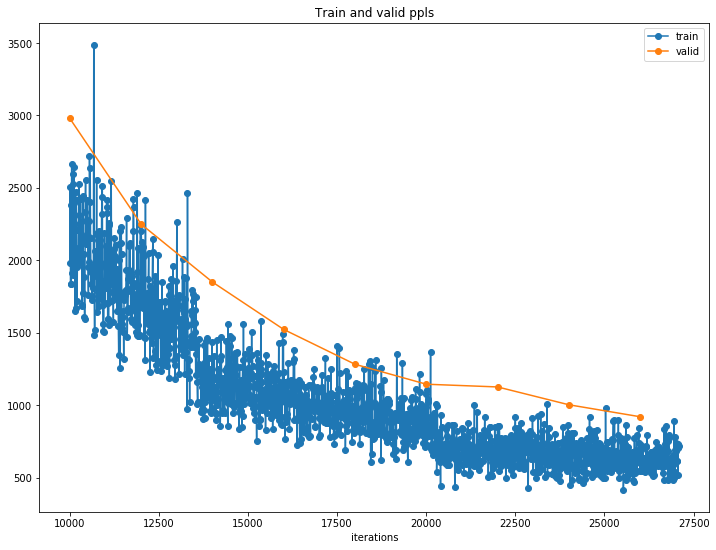

In [8]:
import json
import matplotlib.pyplot as plt
import numpy as np

%matplotlib inline

import mpld3
mpld3.enable_notebook()

file_name = 'outputs/loss_10-21-2019-06:07PM'
with open(file_name) as f:
    all_results = json.load(f)
    # print(result)
    

LOG_EVERY = 10
VALID_ITER = 2000

# The data of 4 epoches
train_ppls = np.array(all_results['train_ppls'])
valid_ppls = np.array(all_results['valid_ppls'])
# print(len(train_ppls))
train_data_iters = np.arange(1, len(train_ppls) + 1) * LOG_EVERY
valid_data_iters = np.arange(1, len(valid_ppls) + 1) * VALID_ITER


# Cut it by some index, or the too large data would make the graph a mess
CUT_ITER = 10000
train_first_idx = np.where(train_data_iters >= CUT_ITER)[0][0]
valid_first_idx = np.where(valid_data_iters >= CUT_ITER)[0][0]

plt.title('Train and valid ppls')
plt.plot(train_data_iters[train_first_idx:], train_ppls[train_first_idx:], '-o', label='train')
plt.plot(valid_data_iters[valid_first_idx:], valid_ppls[valid_first_idx:], '-o', label='valid')
# print(len(valid_ppls))
# plt.plot([0.5] * len(solver.val_acc_history), 'k--')
plt.xlabel('iterations')
plt.legend(loc='lower left')
plt.gcf().set_size_inches(12, 9)
plt.show()